In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
powerlifting = pd.read_pickle('./powerlifting_clean.p')

In [3]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
powerlifting['SexBinary'] = powerlifting.Sex.apply(lambda x: 1 if x == 'F' else 0)

In [5]:
powerlifting['EquipmentBinary'] = powerlifting.Equipment.apply(lambda x: 0 if x == 'Raw' else 1)

In [84]:
cleaned = powerlifting[(powerlifting['Age'].isnull()==False) & (powerlifting['TotalKg'].isnull()==False)]
X = cleaned[['BodyweightKg', 'Age', 'SexBinary', 'EquipmentBinary']]
y = cleaned['TotalKg']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [86]:
# fit a simple linear model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
lr.score(X_test, y_test)

0.61802806843922731

In [10]:
lr.score(X, y)

0.6231002831531125

In [11]:
lr.coef_

array([   3.39668619,   -0.30166395, -169.13023596,   77.32436785])

In [87]:
params = {
    'alpha': np.logspace(-4, 0, 10),
    'normalize': [True, False]
}

grid = GridSearchCV(Lasso(), params, cv = 5, n_jobs = -1)

In [88]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([  1.00000e-04,   2.78256e-04,   7.74264e-04,   2.15443e-03,
         5.99484e-03,   1.66810e-02,   4.64159e-02,   1.29155e-01,
         3.59381e-01,   1.00000e+00]), 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [89]:
params = {
    'alpha': np.logspace(-1, 2, 10),
    'normalize': [True, False],
    'l1_ratio': np.linspace(0, 1, 10)
}

grid = GridSearchCV(ElasticNet(), params, cv = 5, n_jobs = -1)

In [90]:
grid.fit(X_train, y_train)

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alp

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([   0.1    ,    0.21544,    0.46416,    1.     ,    2.15443,
          4.64159,   10.     ,   21.54435,   46.41589,  100.     ]), 'l1_ratio': array([ 0.     ,  0.11111,  0.22222,  0.33333,  0.44444,  0.55556,
        0.66667,  0.77778,  0.88889,  1.     ]), 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [91]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score', ascending=True).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,param_normalize,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
19,0.137975,0.002092,0.619171,0.619358,0.1,1,False,"{'alpha': 0.1, 'l1_ratio': 1.0, 'normalize': F...",1,0.627783,...,0.608549,0.622002,0.619121,0.619376,0.622581,0.618496,0.006882,0.000387,0.006331,0.001582
39,0.107561,0.004870,0.619157,0.619344,0.215443,1,False,"{'alpha': 0.215443469003, 'l1_ratio': 1.0, 'no...",2,0.627787,...,0.608502,0.621988,0.619093,0.619363,0.622556,0.618482,0.042518,0.004748,0.006345,0.001582
59,0.166871,0.002424,0.619093,0.619280,0.464159,1,False,"{'alpha': 0.464158883361, 'l1_ratio': 1.0, 'no...",3,0.627761,...,0.608364,0.621924,0.618997,0.619299,0.622470,0.618417,0.102885,0.001211,0.006374,0.001582
79,0.127820,0.002367,0.618795,0.618983,1,1,False,"{'alpha': 1.0, 'l1_ratio': 1.0, 'normalize': F...",4,0.627543,...,0.607903,0.621626,0.618631,0.619004,0.622131,0.618119,0.026156,0.000348,0.006440,0.001582
17,0.151503,0.002149,0.618344,0.618530,0.1,0.888889,False,"{'alpha': 0.1, 'l1_ratio': 0.888888888889, 'no...",5,0.627268,...,0.607246,0.621179,0.618117,0.618556,0.621671,0.617667,0.013734,0.000683,0.006554,0.001585


In [92]:
grid.score(X_train, y_train)

0.61934962080937617

In [93]:
grid.score(X_test, y_test)

0.63412970370008925

In [94]:
grid.score(X, y)

0.62309519042093586

In [95]:
predictions = grid.predict(X)
cleaned['predictions'] = predictions

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [96]:
residuals = cleaned['TotalKg'].values - cleaned['predictions'].values 
cleaned['residuals'] = residuals

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [97]:
cleaned['residuals'].describe()

count    42199.000000
mean         0.274720
std        103.959744
min       -700.368445
25%        -61.777202
50%          0.991401
75%         62.830321
max        442.678180
Name: residuals, dtype: float64

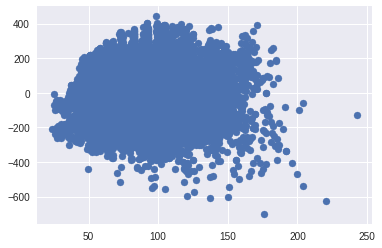

In [98]:
plt.scatter(cleaned['BodyweightKg'], cleaned['residuals'])

In [99]:
np.corrcoef(cleaned['BodyweightKg'], cleaned['residuals'])

array([[  1.00000000e+00,   4.51332540e-05],
       [  4.51332540e-05,   1.00000000e+00]])

In [100]:
list(zip(X.columns, grid.best_estimator_.coef_))

[('BodyweightKg', 3.3747712976367286),
 ('Age', -0.25624698801651441),
 ('SexBinary', -169.02426335584298),
 ('EquipmentBinary', 76.870654737918457)]

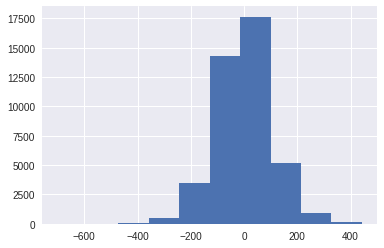

In [101]:
plt.hist(cleaned['residuals'])
plt.show()

In [28]:
from scipy.stats import skewtest

skewtest(cleaned['residuals'])

SkewtestResult(statistic=-8.2424050666812114, pvalue=1.687830251382622e-16)

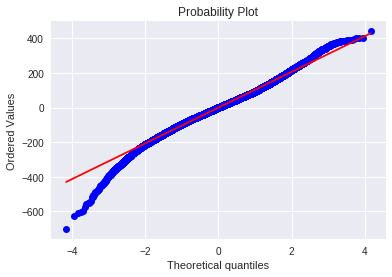

In [29]:
import scipy.stats as stats 
stats.probplot(cleaned['residuals'], dist="norm", plot=plt)
plt.show()

In [102]:
cleaned.sort_values('residuals', ascending = True).head(10)

,Age,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,BestBenchKg,BestDeadliftKg,BestSquatKg,BirthYear,BodyweightKg,...,TotalKg,WeightClassKg,Wilks,Year,calcWilks,SexBinary,EquipmentBinary,BodyweightKg_twothirds,predictions,residuals
48972,58.000000,NaN,NaN,NaN,NaN,25.0,65.0,25.0,1959.0,176.0,...,115.0,120+,NaN,2017,62.114005,0,0,31.405698,815.368445,-700.368445
44228,33.000000,105.0,110.0,-117.5,NaN,110.0,130.0,107.5,1984.0,220.2,...,347.5,120+,NaN,2017,188.188426,0,0,36.465167,970.939511,-623.439511
15156,56.666667,NaN,NaN,NaN,NaN,25.0,25.0,25.0,NaN,137.4,...,75.0,125+,NaN,2014,42.030356,0,0,26.627138,685.443935,-610.443935
27142,46.000000,25.0,NaN,NaN,NaN,25.0,75.0,25.0,1971.0,149.8,...,125.0,120+,NaN,2017,69.174918,0,0,28.205981,730.024400,-605.024400
8671,71.500000,20.0,NaN,NaN,NaN,20.0,65.0,20.0,NaN,121.0,...,105.0,125,NaN,2014,60.252109,0,1,24.463781,703.167344,-598.167344
16582,51.888889,NaN,NaN,NaN,NaN,25.0,25.0,25.0,NaN,125.6,...,75.0,125+,NaN,2014,42.697148,0,0,25.079936,646.845925,-571.845925
56606,18.000000,29.5,31.8,36.3,NaN,36.3,36.3,34.0,1999.0,104.9,...,106.6,105,NaN,2017,63.720535,0,1,22.242503,662.542740,-555.942740
22157,43.500000,NaN,NaN,NaN,NaN,25.0,25.0,25.0,NaN,95.5,...,75.0,105,NaN,2014,46.542154,0,1,20.893069,624.285591,-549.285591
6039,14.000000,37.5,42.5,45.0,NaN,45.0,112.5,37.5,2003.0,150.9,...,195.0,120+,NaN,2017,107.801778,0,0,28.343893,741.936552,-546.936552
50973,15.162791,25.0,NaN,NaN,NaN,25.0,45.0,25.0,NaN,96.9,...,95.0,105,NaN,2016,58.577694,0,1,21.096764,636.271595,-541.271595


In [103]:
cleaned.sort_values('residuals', ascending = False).head(10)

,Age,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,BestBenchKg,BestDeadliftKg,BestSquatKg,BirthYear,BodyweightKg,...,TotalKg,WeightClassKg,Wilks,Year,calcWilks,SexBinary,EquipmentBinary,BodyweightKg_twothirds,predictions,residuals
71219,27.0,285.0,295.0,297.5,NaN,297.5,375.0,407.5,1990.0,98.11,...,1080.0,105,NaN,2017,662.429463,0,1,21.272026,637.321820,442.678180
74194,29.0,280.0,292.0,295.0,NaN,295.0,367.5,385.0,1981.0,99.48,...,1047.5,100,NaN,2010,638.835313,0,1,21.469595,641.432762,406.067238
70781,25.0,-280.0,280.0,285.0,NaN,285.0,350.0,387.5,1990.0,92.15,...,1022.5,93,NaN,2015,645.156245,0,1,20.401569,617.720677,404.779323
70782,28.0,277.5,287.5,-292.5,NaN,287.5,350.0,380.0,1987.0,92.06,...,1017.5,93,NaN,2015,642.305393,0,1,20.388283,616.648206,400.851794
70820,30.0,300.0,312.5,317.5,NaN,317.5,362.5,415.0,1985.0,116.58,...,1095.0,120,NaN,2015,633.988348,0,1,23.864337,698.885104,396.114896
73342,31.0,NaN,NaN,NaN,NaN,235.0,377.5,423.0,NaN,100.00,...,1035.0,100,NaN,1994,629.889689,0,1,21.544347,642.675149,392.324851
73819,40.0,255.0,260.0,-262.5,NaN,260.0,387.5,400.0,1972.0,104.39,...,1047.5,105,NaN,2012,627.228615,0,1,22.170353,655.184172,392.315828
72951,27.0,310.0,-320.0,320.0,NaN,320.0,320.0,410.0,1987.0,104.16,...,1050.0,105,NaN,2014,629.221757,0,1,22.137776,657.739186,392.260814
30242,30.0,205.0,365.0,410.0,NaN,410.0,357.5,505.0,1987.0,170.68,...,1272.5,120+,NaN,2017,690.709052,0,1,30.769593,881.460232,391.039768
75432,26.0,310.0,323.0,-327.5,NaN,323.0,325.0,402.5,1987.0,104.92,...,1050.5,105,NaN,2013,627.898072,0,1,22.245330,660.560259,389.939741


In [33]:
# refit the model using bodyweight ^ 2/3 instead of bodyweight

powerlifting['BodyweightKg_twothirds'] = powerlifting['BodyweightKg'].apply(lambda x: x**(2/3))

In [106]:
cleaned2 = powerlifting[(powerlifting['Age'].isnull()==False) & (powerlifting['TotalKg'].isnull()==False)]
X2 = cleaned2[['BodyweightKg_twothirds', 'Age', 'SexBinary', 'EquipmentBinary']]
y2 = cleaned2['TotalKg']

In [107]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

In [108]:
grid.fit(X2_train, y2_train)

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alp

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([   0.1    ,    0.21544,    0.46416,    1.     ,    2.15443,
          4.64159,   10.     ,   21.54435,   46.41589,  100.     ]), 'l1_ratio': array([ 0.     ,  0.11111,  0.22222,  0.33333,  0.44444,  0.55556,
        0.66667,  0.77778,  0.88889,  1.     ]), 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [109]:
display(grid.score(X2_train, y2_train))
display(grid.score(X2_test, y2_test))

0.62479316651069683

0.62834085840277387

In [111]:
grid.score(X2, y2)

0.62570304484596306

In [112]:
list(zip(X2.columns, grid.best_estimator_.coef_))

[('BodyweightKg_twothirds', 22.537885053209681),
 ('Age', -0.30546186848174267),
 ('SexBinary', -166.32802045521606),
 ('EquipmentBinary', 77.573407136543565)]

In [115]:
predictionsb = grid.predict(X2)
cleaned2['predictionsb'] = predictionsb
residualsb = cleaned2['TotalKg'].values - cleaned2['predictionsb'].values 
cleaned2['residualsb'] = residualsb

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


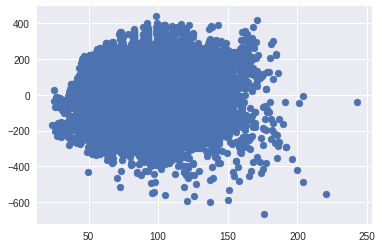

In [116]:
plt.scatter(cleaned2['BodyweightKg'], cleaned2['residualsb'])

In [117]:
np.corrcoef(cleaned2['BodyweightKg'], cleaned2['residualsb'])

array([[ 1.        ,  0.00144709],
       [ 0.00144709,  1.        ]])

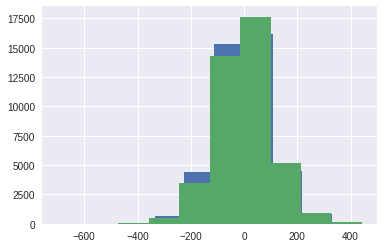

In [120]:
plt.hist(cleaned2['residualsb'])
plt.hist(cleaned['residuals'])
plt.show()

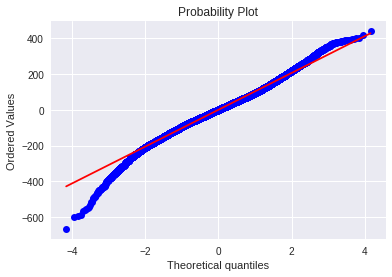

In [123]:
stats.probplot(cleaned2['residualsb'], dist="norm", plot=plt)

plt.show()

In [126]:
cleaned2['residuals'] = cleaned['residuals'].values
cleaned2['predictions'] = cleaned['predictions'].values

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [127]:
cleaned2[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary', 'predictions', 'predictionsb', 'residuals', 'residualsb']].sort_values('residualsb', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,predictions,predictionsb,residuals,residualsb
48972,58.000000,M,176.0,115.0,0,815.368445,781.361615,-700.368445,-666.361615
15156,56.666667,M,137.4,75.0,0,685.443935,674.070269,-610.443935,-599.070269
8671,71.500000,M,121.0,105.0,1,703.167344,698.355168,-598.167344,-593.355168
27142,46.000000,M,149.8,125.0,0,730.024400,712.912312,-605.024400,-587.912312
16582,51.888889,M,125.6,75.0,0,646.845925,640.659041,-571.845925,-565.659041
56606,18.000000,M,104.9,106.6,1,662.542740,664.634471,-555.942740,-558.034471
44228,33.000000,M,220.2,347.5,0,970.939511,903.027907,-623.439511,-555.527907
22157,43.500000,M,95.5,75.0,1,624.285591,626.431814,-549.285591,-551.431814
50973,15.162791,M,96.9,95.0,1,636.271595,639.678603,-541.271595,-544.678603
6039,14.000000,M,150.9,195.0,0,741.936552,725.795327,-546.936552,-530.795327


In [137]:
cleaned2[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions', 'predictionsb', 'residuals', 'residualsb']].sort_values('residuals', ascending=False).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,predictionsb,residuals,residualsb
71219,27.0,M,98.11,1080.0,1,105,637.321820,640.012809,442.678180,439.987191
74194,29.0,M,99.48,1047.5,1,100,641.432762,643.854677,406.067238,403.645323
70781,25.0,M,92.15,1022.5,1,93,617.720677,621.005469,404.779323,401.494531
70782,28.0,M,92.06,1017.5,1,93,616.648206,619.789647,400.851794,397.710353
70820,30.0,M,116.58,1095.0,1,120,698.885104,697.521628,396.114896,397.478372
73342,31.0,M,100.00,1035.0,1,100,642.675149,644.928504,392.324851,390.071496
73819,40.0,M,104.39,1047.5,1,105,655.184172,656.288189,392.315828,391.211811
72951,27.0,M,104.16,1050.0,1,105,657.739186,659.524979,392.260814,390.475021
30242,30.0,M,170.68,1272.5,1,120+,881.460232,853.151509,391.039768,419.348491
75432,26.0,M,104.92,1050.5,1,105,660.560259,662.254492,389.939741,388.245508


In [138]:
cleaned2.residualsb.describe()

count    42199.000000
mean         0.242142
std        103.599543
min       -666.361615
25%        -61.863582
50%          0.779355
75%         62.667400
max        439.987191
Name: residualsb, dtype: float64

In [49]:
skewtest(cleaned['residualsb'])

SkewtestResult(statistic=-5.3106940237660787, pvalue=1.0920854882759879e-07)

In [55]:
# column for "is super heavyweight" 
# fit for genders separately
# interaction effect MLR (on gender/gear)
# interaction effect MLR (on gender/bodyweight)
# make age quadratic
# keep in age as well as age quadratic?

In [132]:
display (cleaned2.groupby('SexBinary').min()['residualsb'])
display (cleaned2.groupby('SexBinary').min()['residuals'])

SexBinary
0   -666.361615
1   -412.958190
Name: residualsb, dtype: float64

SexBinary
0   -700.368445
1   -442.026929
Name: residuals, dtype: float64

In [133]:
display (cleaned2.groupby('SexBinary').max()['residualsb'])
display (cleaned2.groupby('SexBinary').max()['residuals'])

SexBinary
0    439.987191
1    291.587203
Name: residualsb, dtype: float64

SexBinary
0    442.67818
1    292.27930
Name: residuals, dtype: float64

In [134]:
cleaned2[(cleaned2['residualsb'] > 291)&(cleaned2['SexBinary']==1)][['TotalKg', 'SexBinary', 'BodyweightKg', 'predictionsb','residualsb']]

,TotalKg,SexBinary,BodyweightKg,predictionsb,residualsb
68241,638.5,1,62.62,346.912797,291.587203


In [135]:
cleaned2.groupby(['SexBinary', 'EquipmentBinary']).max()['residualsb']

SexBinary  EquipmentBinary
0          0                  379.322925
           1                  439.987191
1          0                  235.145143
           1                  291.587203
Name: residualsb, dtype: float64

In [136]:
cleaned2.groupby(['SexBinary', 'EquipmentBinary']).min()['residualsb']

SexBinary  EquipmentBinary
0          0                 -666.361615
           1                 -593.355168
1          0                 -412.958190
           1                 -313.349778
Name: residualsb, dtype: float64

In [161]:
# column for "is super heavyweight" 
# fit for genders separately
# interaction effect MLR (on gender/gear)
# interaction effect MLR (on gender/bodyweight)
# make age quadratic
# keep in age as well as age quadratic? (yes)

Women are getting eclipsed by men on both sides in the equation as it stands now. There are two things that could be done to fix this: either add interaction terms (so gender * other features), or split up men and women and find separate sets of coefficients. I have decided to separate out men and women for a few reasons. They are as follows:
- every added feature is added complexity to the formula we are predicting. Although I don't anticipate this formula being adopted any time soon, I still intend to build something that is easy to understand/implement. 
- Wilks score has separate coefficient values for men and women, maybe I don't need to completely break the wheel here.
- it really seems like there is something non-linear about men and women's relative strength, that can't be measured by simply turning on/off a value.

I will also try to capture the age-total relationship (seems non-linear as well) and add a column for super heavyweights. 

In [156]:
is_SHW = []
for row in cleaned.iterrows():
    if (row[1]['BodyweightKg'] > 84 and row[1]['SexBinary'] == 1) or (row[1]['BodyweightKg'] > 120 and row[1]['SexBinary'] == 0):
        is_SHW.append(1)
    else:
        is_SHW.append(0)

In [157]:
cleaned['is_SHW'] = is_SHW

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Created a polynomial feature for Age

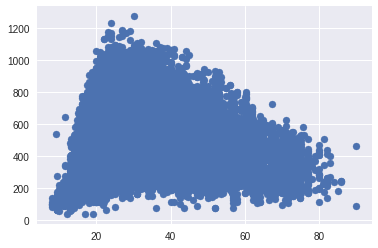

In [160]:
plt.scatter(cleaned['Age'], cleaned['TotalKg'])
plt.show()

In [186]:
cleaned['Age_squared'] = cleaned.Age.apply(lambda x: x**2)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [220]:
cleaned['BW/E'] = cleaned['BodyweightKg'].values * cleaned['EquipmentBinary'].values

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [259]:
cleaned['allo_BW/E'] = cleaned['BodyweightKg_twothirds'].values * cleaned['EquipmentBinary'].values

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [260]:
cleaned.columns

Index(['Age', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'BestBenchKg',
       'BestDeadliftKg', 'BestSquatKg', 'BirthYear', 'BodyweightKg', 'Country',
       'Date', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Division', 'Equipment', 'Event', 'Federation', 'MeetCountry',
       'MeetName', 'MeetState', 'MeetTown', 'Name', 'Place', 'School', 'Sex',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'State', 'Team',
       'TotalKg', 'WeightClassKg', 'Wilks', 'Year', 'calcWilks', 'SexBinary',
       'EquipmentBinary', 'BodyweightKg_twothirds', 'predictions', 'residuals',
       'is_SHW', 'Age_squared', 'BW/E', 'allo_BW/E'],
      dtype='object')

In [261]:
# separate data into men and women:

men = cleaned[cleaned['SexBinary'] == 0]
women = cleaned[cleaned['SexBinary'] == 1]

In [262]:
display(men.shape)
display(women.shape)

(27372, 48)

(14827, 48)

In [264]:
# fit model for men 

Xm = men[['BodyweightKg_twothirds', 'Age', 'Age_squared', 'allo_BW/E', 'is_SHW', 'EquipmentBinary']]
ym = men['TotalKg']

In [265]:
X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm, ym, random_state = 42)

In [266]:
en_paramsm = {
    'alpha': np.logspace(-1, 2, 10), 
    'l1_ratio': np.linspace(0, 1, 5)
}

en_gridm = GridSearchCV(ElasticNet(), en_params, cv = 5)
en_gridm.fit(X_trainm, y_trainm)

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([   0.1    ,    0.21544,    0.46416,    1.     ,    2.15443,
          4.64159,   10.     ,   21.54435,   46.41589,  100.     ]), 'l1_ratio': array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [267]:
en_gridm.score(X_testm, y_testm)

0.51173351305283221

In [268]:
pd.DataFrame(en_gridm.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
4,0.122443,0.001037,0.504815,0.506000,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1.0}",1,0.506542,0.505595,...,0.510844,0.504652,0.487072,0.510524,0.526997,0.500165,0.021521,0.000174,0.014105,0.003631
9,0.071208,0.000909,0.504763,0.505933,0.215443,1,"{'alpha': 0.215443469003, 'l1_ratio': 1.0}",2,0.506558,0.505523,...,0.510709,0.504605,0.486928,0.510470,0.526855,0.500044,0.010280,0.000040,0.014061,0.003653
14,0.070758,0.000954,0.504547,0.505715,0.464159,1,"{'alpha': 0.464158883361, 'l1_ratio': 1.0}",3,0.506518,0.505307,...,0.510296,0.504387,0.486529,0.510255,0.526437,0.499824,0.003130,0.000039,0.013964,0.003655
19,0.106607,0.002007,0.503542,0.504707,1,1,"{'alpha': 1.0, 'l1_ratio': 1.0}",4,0.505887,0.504304,...,0.508841,0.503376,0.485163,0.509258,0.525014,0.498799,0.100322,0.002010,0.013766,0.003664
3,0.125633,0.000982,0.503397,0.504542,0.1,0.75,"{'alpha': 0.1, 'l1_ratio': 0.75}",5,0.505583,0.504100,...,0.508679,0.503275,0.485021,0.509146,0.525017,0.498689,0.034093,0.000082,0.013801,0.003633


In [269]:
list(zip(Xm.columns, en_gridm.best_estimator_.coef_))

[('BodyweightKg_twothirds', 24.819642664441535),
 ('Age', 18.375655797857913),
 ('Age_squared', -0.2476227223673437),
 ('allo_BW/E', 5.0131176699225009),
 ('is_SHW', -65.217066306031157),
 ('EquipmentBinary', -1.5166181769881544)]

In [278]:
Xw = women[['BodyweightKg_twothirds', 'Age', 'Age_squared', 'allo_BW/E', 'is_SHW', 'EquipmentBinary']]
yw = women['TotalKg']

X_trainw, X_testw, y_trainw, y_testw = train_test_split(Xw, yw, random_state = 42)

en_paramsw = {
    'alpha': np.logspace(-1, 2, 10), 
    'l1_ratio': np.linspace(0, 1, 5)
}

en_gridw = GridSearchCV(ElasticNet(), en_paramsw, cv = 5)
en_gridw.fit(X_trainw, y_trainw)

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([   0.1    ,    0.21544,    0.46416,    1.     ,    2.15443,
          4.64159,   10.     ,   21.54435,   46.41589,  100.     ]), 'l1_ratio': array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [279]:
en_gridw.score(X_testw, y_testw)

0.41210756620556599

In [280]:
pd.DataFrame(en_gridw.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
4,0.030892,0.000811,0.398465,0.399715,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1.0}",1,0.415546,0.395562,...,0.376531,0.405067,0.373152,0.406064,0.403866,0.398492,0.001495,0.000052,0.020279,0.005054
9,0.028772,0.002039,0.398354,0.399602,0.215443,1,"{'alpha': 0.215443469003, 'l1_ratio': 1.0}",2,0.415243,0.395450,...,0.376491,0.404954,0.373004,0.405952,0.403822,0.398379,0.000720,0.002538,0.020267,0.005055
14,0.028011,0.000791,0.397834,0.399077,0.464159,1,"{'alpha': 0.464158883361, 'l1_ratio': 1.0}",3,0.414318,0.394930,...,0.376107,0.404430,0.372414,0.405432,0.403444,0.397853,0.000819,0.000017,0.020244,0.005058
3,0.031984,0.000814,0.397230,0.398464,0.1,0.75,"{'alpha': 0.1, 'l1_ratio': 0.75}",4,0.413605,0.394370,...,0.375467,0.403806,0.371711,0.404848,0.402928,0.397215,0.002564,0.000011,0.020302,0.005067
2,0.035399,0.000774,0.395920,0.397147,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",5,0.411938,0.393113,...,0.374245,0.402483,0.370364,0.403563,0.401747,0.395869,0.007210,0.000018,0.020287,0.005080


In [281]:
list(zip(Xw.columns, en_gridw.best_estimator_.coef_))

[('BodyweightKg_twothirds', 13.130379588213952),
 ('Age', 12.031817623962967),
 ('Age_squared', -0.16316063594572669),
 ('allo_BW/E', 4.7812144520561661),
 ('is_SHW', -35.523196813132202),
 ('EquipmentBinary', -0.0)]

In [282]:
# get predictions and residuals for men + women

predictions_m = en_gridm.predict(Xm)
predictions_w = en_gridw.predict(Xw)

residuals_m = men['TotalKg'].values - predictions_m
residuals_w = women['TotalKg'].values - predictions_w

men['residuals'] = residuals_m
women['residuals'] = residuals_w

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


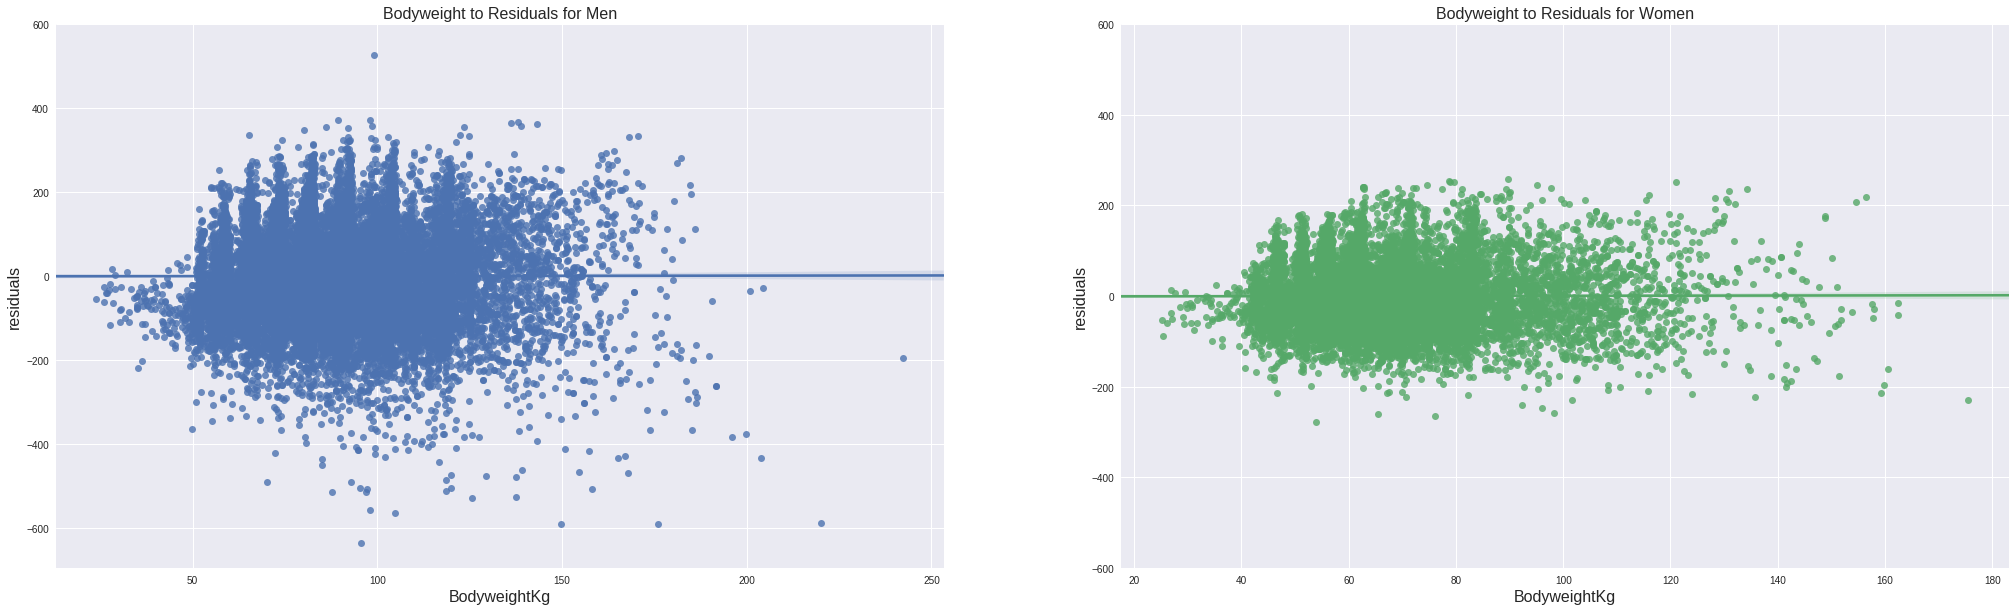

In [283]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(35, 10))

sns.regplot(men['BodyweightKg'], men['residuals'], ax=axes[0])
sns.regplot(women['BodyweightKg'], women['residuals'], ax=axes[1])
axes[0].set_title('Bodyweight to Residuals for Men')
axes[1].set_title('Bodyweight to Residuals for Women')
for ax in axes:
    plt.sca(ax)
    plt.yticks([-600, -400, -200, 0, 200, 400, 600])
    ax.title.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    ax.xaxis.label.set_fontsize(16)
plt.show()

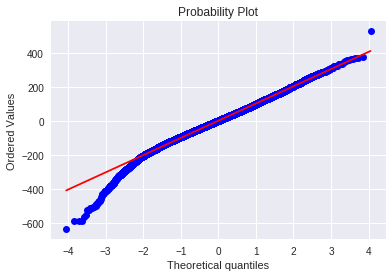

In [284]:
# probability plot for men's residuals (compared to a normal distribution)
stats.probplot(men['residuals'], dist="norm", plot=plt)

plt.show()

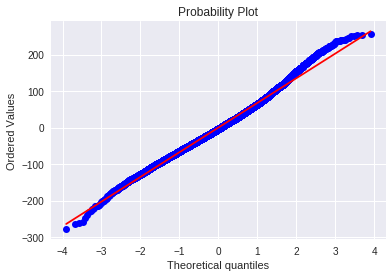

In [285]:
# probability plot for women's residuals (compared to a normal distribution)
stats.probplot(women['residuals'], dist="norm", plot=plt)

plt.show()

In [287]:
display (men.min()['residuals'])
display (men.max()['residuals'])
display (women.min()['residuals'])
display (women.max()['residuals'])

-636.29747252104357

526.68598108843014

-277.54350866532775

257.69087178033436

In [289]:
men['predictions'] = predictions_m
women['predictions'] = predictions_w

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


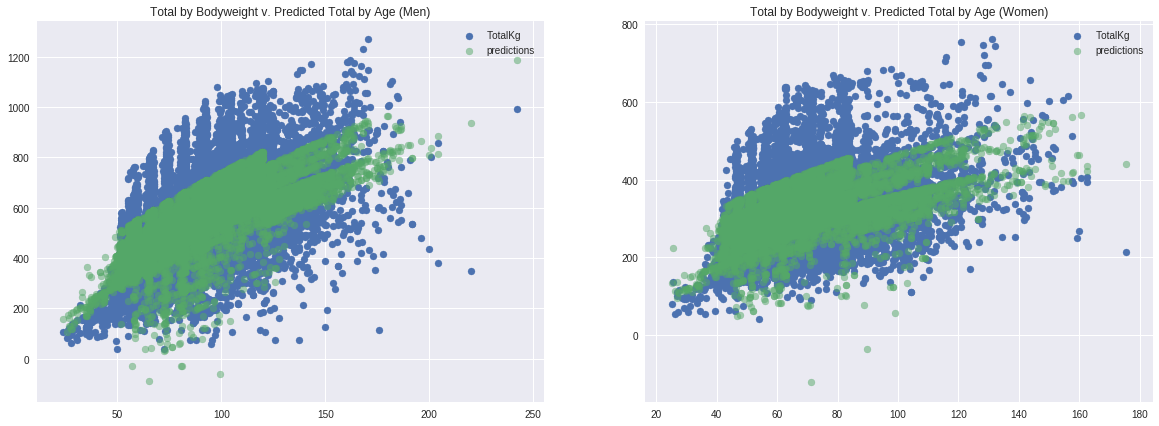

In [346]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

axes[0].scatter(men['BodyweightKg'], men['TotalKg'])
axes[0].scatter(men['BodyweightKg'], men['predictions'], alpha=.5)
axes[0].legend()
axes[1].scatter(women['BodyweightKg'], women['TotalKg'])
axes[1].scatter(women['BodyweightKg'], women['predictions'], alpha=.5)
axes[1].legend()

axes[0].set_title('Total by Bodyweight v. Predicted Total by Age (Men)')
axes[1].set_title('Total by Bodyweight v. Predicted Total by Age (Women)')

plt.show()

In [290]:
men[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions','residuals']].sort_values('residuals', ascending=False).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
1293,90.000000,M,99.10,465.0,0,105,-61.685981,526.685981
71219,27.000000,M,98.11,1080.0,1,105,707.451597,372.548403
37953,22.462372,M,89.30,914.0,0,90,542.424644,371.575356
73855,23.000000,M,137.94,1147.5,1,120+,780.094165,367.405835
68932,22.000000,M,136.20,1130.0,1,120+,766.149738,363.850262
75462,24.000000,M,143.20,1170.0,1,120+,806.951877,363.048123
1335,81.250000,M,98.60,505.0,0,105,146.784907,358.215093
73312,24.000000,M,138.92,1147.5,1,NaN,790.599330,356.900670
33346,82.000000,M,86.10,440.0,0,93,84.474620,355.525380
73650,20.000000,M,123.56,1055.0,1,125,700.549633,354.450367


In [291]:
men[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions','residuals']].sort_values('residuals', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
22157,43.500000,M,95.5,75.0,1,105,711.297473,-636.297473
48972,58.000000,M,176.0,115.0,0,120+,705.785552,-590.785552
27142,46.000000,M,149.8,125.0,0,120+,714.895016,-589.895016
44228,33.000000,M,220.2,347.5,0,120+,935.310078,-587.810078
56606,18.000000,M,104.9,106.6,1,105,671.309913,-564.709913
56605,27.000000,M,98.0,149.7,1,105,706.977168,-557.277168
16582,51.888889,M,125.6,75.0,0,125+,602.776095,-527.776095
15156,56.666667,M,137.4,75.0,0,125+,600.541296,-525.541296
60867,36.000000,M,87.6,75.0,0,90,588.895148,-513.895148
50973,15.162791,M,96.9,95.0,1,105,608.292550,-513.292550


In [353]:
women[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions','residuals']].sort_values('residuals', ascending=False).head(15)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
74320,27.0,F,89.76,680.0,1,90,422.309128,257.690872
68262,24.0,F,78.62,670.5,1,84,416.339476,254.160524
68794,22.0,F,78.89,660.5,1,84,408.038786,252.461214
74895,21.0,F,79.69,657.5,1,84,405.246498,252.253502
73518,27.0,F,120.95,753.0,1,84+,501.295168,251.704832
59832,27.0,F,95.10,682.5,1,90+,436.413057,246.086943
73252,19.0,F,74.52,625.0,1,75,379.729897,245.270103
68241,36.0,F,62.62,638.5,1,63,396.978939,241.521061
73487,35.0,F,62.84,638.0,1,63,397.192688,240.807312
74001,35.0,F,62.60,636.0,1,NaN,396.471383,239.528617


In [293]:
women[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions','residuals']].sort_values('residuals', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
56553,19.000000,F,53.97,40.8,1,57,318.343509,-277.543509
10406,18.711864,F,76.10,117.5,1,84,382.503748,-265.003748
69943,29.000000,F,65.42,135.0,1,72,395.352474,-260.352474
7937,48.571429,F,98.30,180.0,1,90+,438.299913,-258.299913
55698,43.500000,F,96.00,200.0,1,NaN,447.492203,-247.492203
48601,21.840278,F,92.40,167.9,1,90+,408.351828,-240.451828
26505,20.000000,F,101.60,192.5,1,84+,422.686595,-230.186595
41154,19.481953,F,175.50,212.5,0,84+,441.379222,-228.879222
63840,41.500000,F,135.71,325.0,1,90+,548.648237,-223.648237
31423,50.989583,F,70.70,165.0,1,72,388.381807,-223.381807


In [296]:
men.groupby('EquipmentBinary').mean()['TotalKg']

EquipmentBinary
0    524.620348
1    607.850178
Name: TotalKg, dtype: float64

In [295]:
women.groupby('EquipmentBinary').mean()['TotalKg']

EquipmentBinary
0    293.090899
1    357.076866
Name: TotalKg, dtype: float64

In [331]:
men[['Age', 'Sex', 'BodyweightKg', \
     'TotalKg', 'EquipmentBinary',\
     'WeightClassKg', 'predictions','residuals']].sort_values('predictions', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
287,86.0,M,65.20,245.0,0,66,-90.309203,335.309203
1293,90.0,M,99.10,465.0,0,105,-61.685981,526.685981
12097,82.0,M,57.20,222.5,0,59,-31.010037,253.510037
12099,86.0,M,80.60,242.5,0,83,-29.260543,271.760543
23997,86.0,M,81.10,235.0,0,83,-27.347252,262.347252
71938,82.0,M,72.45,265.0,0,74,31.869191,233.130809
12098,82.0,M,73.00,250.0,0,74,34.049441,215.950559
48961,80.0,M,63.20,200.0,0,66,37.804331,162.195669
60801,84.0,M,66.20,235.0,1,67.5,41.752880,193.247120
43394,82.0,M,76.30,262.5,0,83,47.017968,215.482032


In [300]:
women[['Age', 'Sex', 'BodyweightKg', \
     'TotalKg', 'EquipmentBinary',\
     'WeightClassKg', 'predictions','residuals']].sort_values('predictions', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
40852,90.000000,F,71.34,90.0,0,72,-120.042218,210.042218
27034,85.000000,F,89.80,182.5,0,84+,-35.509039,218.009039
72291,75.000000,F,46.77,215.0,0,47,47.893348,167.106652
47405,74.818182,F,47.80,207.5,0,52,52.643552,154.856448
27681,80.000000,F,99.00,195.0,0,84+,56.629335,138.370665
72294,75.000000,F,52.15,180.0,0,57,60.725875,119.274125
47406,74.818182,F,52.00,177.5,0,52,62.631098,114.868902
68600,74.000000,F,51.24,160.0,0,52,70.866634,89.133366
69359,73.000000,F,46.42,222.5,0,47,71.273845,151.226155
68602,77.000000,F,70.20,170.0,0,72,75.353342,94.646658


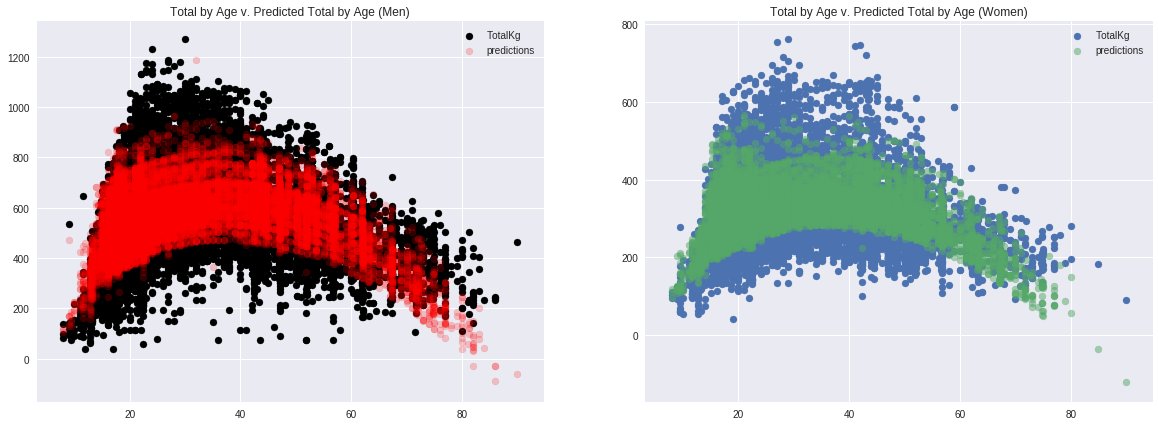

In [352]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

axes[0].scatter(men['Age'], men['TotalKg'], c='k')
axes[0].scatter(men['Age'], men['predictions'], c = 'r', alpha=.2)
axes[0].legend()
axes[1].scatter(women['Age'], women['TotalKg'])
axes[1].scatter(women['Age'], women['predictions'], alpha=.5)
axes[1].legend()

axes[0].set_title('Total by Age v. Predicted Total by Age (Men)')
axes[1].set_title('Total by Age v. Predicted Total by Age (Women)')

plt.show()


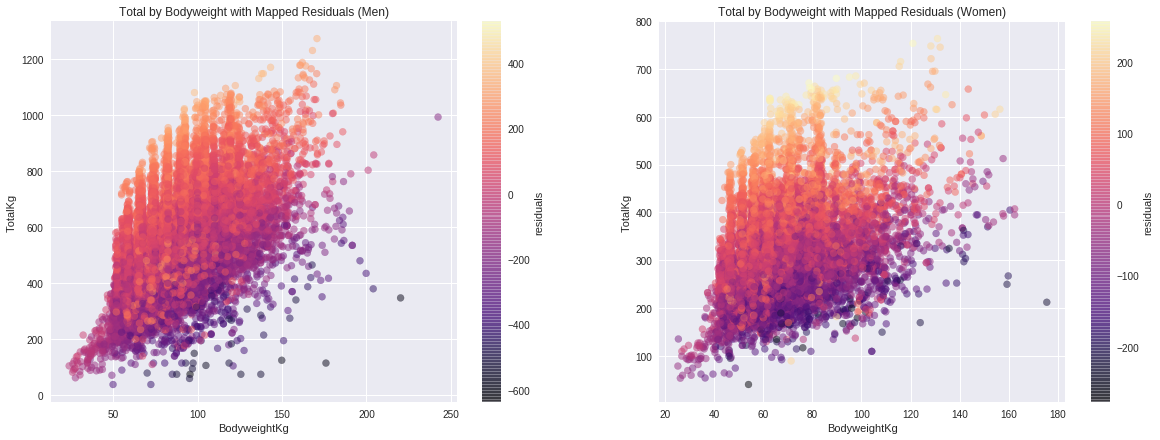

In [386]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

m = axes[0].scatter(men['BodyweightKg'], men['TotalKg'], c=men['residuals'], cmap='magma', alpha=.5)
cbar1 = plt.colorbar(mappable=m, ax=axes[0])
cbar1.set_label('residuals')
axes[0].set_xlabel('BodyweightKg')
axes[0].set_ylabel('TotalKg')
axes[0].set_title('Total by Bodyweight with Mapped Residuals (Men)')

w = axes[1].scatter(women['BodyweightKg'], women['TotalKg'], c=women['residuals'], cmap='magma', alpha=.5)
cbar2 = plt.colorbar(mappable=w)
cbar2.set_label('residuals')
axes[1].set_xlabel('BodyweightKg')
axes[1].set_ylabel('TotalKg')
axes[1].set_title('Total by Bodyweight with Mapped Residuals (Women)')

plt.show()

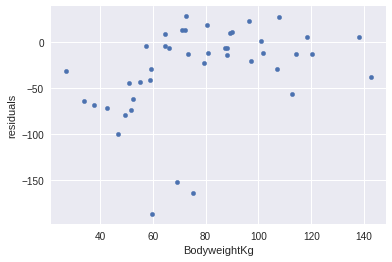

In [403]:
men.groupby('WeightClassKg').mean()[['BodyweightKg','residuals']].plot(x = 'BodyweightKg', y='residuals', kind='scatter')

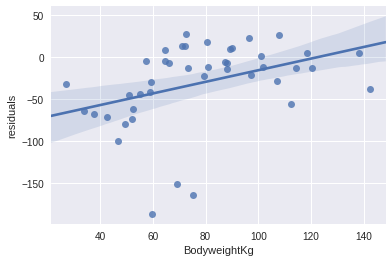

In [406]:
trash = men.groupby('WeightClassKg').mean()[['BodyweightKg','residuals']]

sns.regplot(trash['BodyweightKg'], trash['residuals'])

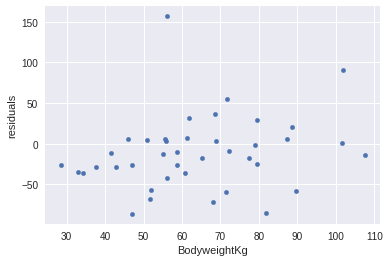

In [404]:
women.groupby('WeightClassKg').mean()[['BodyweightKg','residuals']].plot(x = 'BodyweightKg', y='residuals', kind='scatter')

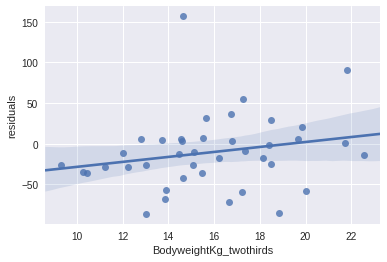

In [452]:
trash2 = women.groupby('WeightClassKg').mean()[['BodyweightKg', 'BodyweightKg_twothirds', 'residuals']]

sns.regplot(trash2['BodyweightKg_twothirds'], trash2['residuals'])

plt.show()

In [453]:
lr = LinearRegression()
lr.fit(trash2[['BodyweightKg_twothirds']].values, trash2['residuals'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [454]:
lr.intercept_

-58.929780365063138

In [455]:
lr.coef_

array([ 3.05870954])

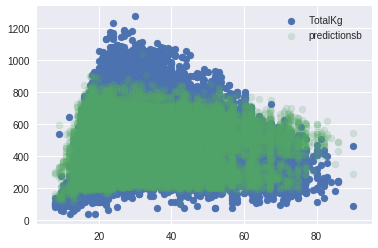

In [344]:
plt.scatter(cleaned2['Age'], cleaned2['TotalKg'])
plt.scatter(cleaned2['Age'], cleaned2['predictionsb'], alpha=.2)
plt.legend()

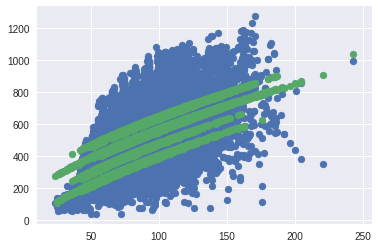

In [321]:
plt.scatter(cleaned2['BodyweightKg'], cleaned2['TotalKg'])
plt.scatter(cleaned2['BodyweightKg'], cleaned2['predictionsb'])

In [313]:
def is_old(val):
    if val >= 70:
        return 1
    else:
        return 0

cleaned['is_old'] = cleaned['Age'].apply(is_old)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [305]:
men[men['predictions']> 1000][['Age', 'Sex', 'BodyweightKg', \
     'TotalKg', 'EquipmentBinary',\
     'WeightClassKg', 'predictions','residuals']]

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
63095,32.0,M,242.4,992.5,1,125+,1186.257509,-193.757509
